In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

#Importing the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Checking the vesion
print('The Pandas version is {}.'.format(pd.__version__))
print('The Numpy version is {}.'.format(np.__version__))
print('The Matplotlib version is {}.'.format(matplotlib.__version__))
print('The Seaborn version is {}.'.format(sns.__version__))

The Pandas version is 1.0.1.
The Numpy version is 1.18.1.
The Matplotlib version is 3.1.3.
The Seaborn version is 0.10.0.


In [3]:
#Display all the columns and rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
import pandas as pd
train = pd.read_excel("train_1.xlsx")
test = pd.read_csv("test.csv")
train.head()

,Unnamed: 0,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,label
0,0,IÃ¢â‚¬â„¢ve spoken to some amazing people here...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1,Can I get a hug pls Ã°Å¸Â¥Âº,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,I actually got my first vaccine this morning. ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,3,I literally find something to be anxious about...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,4,I feel very anxious about starting this job. D...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [5]:
# Dropping the unwanted columns
train.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4","Unnamed: 5","Unnamed: 6","Unnamed: 7","Unnamed: 8","Unnamed: 9","Unnamed: 10",
                    "Unnamed: 11","Unnamed: 12","Unnamed: 13","Unnamed: 14","Unnamed: 15","Unnamed: 16","Unnamed: 17","Unnamed: 18","Unnamed: 19",
                    "Unnamed: 20","Unnamed: 21","Unnamed: 22","Unnamed: 23","Unnamed: 24","Unnamed: 25","Unnamed: 26","Unnamed: 27","Unnamed: 28",
                    "Unnamed: 29"], inplace=True)

In [6]:
train.head()

,Unnamed: 0,text,label
0,0,IÃ¢â‚¬â„¢ve spoken to some amazing people here...,1
1,1,Can I get a hug pls Ã°Å¸Â¥Âº,0
2,2,I actually got my first vaccine this morning. ...,1
3,3,I literally find something to be anxious about...,1
4,4,I feel very anxious about starting this job. D...,1


In [7]:
#Checking the number of unique comments
print("There are {} unique comments in this dataset such as: \n\n{}...".format(len(train.text.unique()),
                                                                           "\n\n".join(train.text.unique()[0:1])))

There are 200 unique comments in this dataset such as: 

IÃ¢â‚¬â„¢ve spoken to some amazing people here and itÃ¢â‚¬â„¢s been a great support network.However IÃ¢â‚¬â„¢ve realised that IÃ¢â‚¬â„¢ve gotten everything I could get out of this experience and now itÃ¢â‚¬â„¢s become overwhelming.My brain wants to soak up all of the information but is drawn to negativity.I need to leave to try and bring myself back to reality. The world isnÃ¢â‚¬â„¢t as bad as my brain wants me to think....


1    175
0     25
Name: label, dtype: int64 



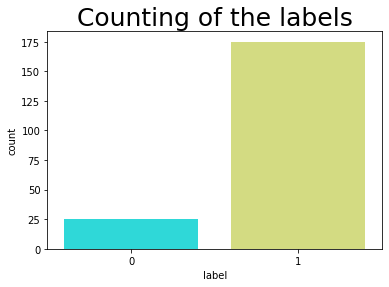

In [8]:
sns.countplot(train.label,palette='rainbow',saturation=0.95)
print(train.label.value_counts(),'\n')
plt.title('Counting of the labels',fontsize=25)
plt.show()

Here we see the counting of values in each labels with their plot.

In [9]:
train['label'].value_counts()

1    175
0     25
Name: label, dtype: int64

In [10]:
# Creating the new column before cleaning the text column
train['comment_length'] = train['text'].str.len()
train.head()

,Unnamed: 0,text,label,comment_length
0,0,IÃ¢â‚¬â„¢ve spoken to some amazing people here...,1,424
1,1,Can I get a hug pls Ã°Å¸Â¥Âº,0,31
2,2,I actually got my first vaccine this morning. ...,1,275
3,3,I literally find something to be anxious about...,1,273
4,4,I feel very anxious about starting this job. D...,1,149


## Data Cleaning Steps for comment_text column

* Remove HTML tags

* Remove special characters

* Convert everything to lowercase

* Remove stopwords

* Lemmatization

In [11]:
import nltk
import string
from nltk.corpus import stopwords

print('The NLTK version is {}'.format(nltk.__version__))

The NLTK version is 3.4.5


In [12]:
# 1-Removing the HTML tags
# Regex rule : "<.*?>"

import re

def clean(text):
    cleaned = re.compile(r"<.*?>")
    return re.sub(cleaned," ",text)

train.text = train.text.apply(clean)
train.text[1]

'Can I get a hug pls Ã°Å¸Â¥Âº   '

In [13]:
# 2- Removing special character like punctuation
# We can use string.punctuation or manually

def is_special(text):
    empty = ''
    for i in text:
        if i.isalpha():
            empty = empty + i
        else:
            empty = empty + ' '
    return empty

train.text = train.text.apply(is_special)
train.text[1]

'Can I get a hug pls Ã Å Â Âº   '

In [14]:
# 3-Converting everything to lowercase

def lower(text):
    return text.lower()

train.text = train.text.apply(lower)
train.text[1]

'can i get a hug pls ã å â âº   '

In [15]:
# 4-Removing the stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stopwords(text):
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure','ã','âº','å','â'])
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

train.text = train.text.apply(remove_stopwords)
train.text[1]

['get', 'hug', 'pls']

In [16]:
# 5-Lemmatization
from nltk.stem import WordNetLemmatizer

def lema_text(text):
    lema = WordNetLemmatizer()
    return " ".join([lema.lemmatize(w) for w in text])

train.text = train.text.apply(lema_text)
train.text[1]

'get hug pls'

In [17]:
# Creating new column (cleaned_text) after removing puncuations,stopwords from news column to check how much data is cleaned
train['cleaned_text'] = train.text.str.len()
train.head()

,Unnamed: 0,text,label,comment_length,cleaned_text
0,0,iã spoken amazing people itã great support net...,1,424,247
1,1,get hug pls,0,31,11
2,2,actually got first vaccine morning meant go do...,1,275,150
3,3,literally find something anxious even thereã a...,1,273,166
4,4,feel anxious starting job people advice racing...,1,149,82


#### Observation: Here we see the origional length of our comment_text column and cleaned length of our comment_text columns and their difference means how much data is cleaned.

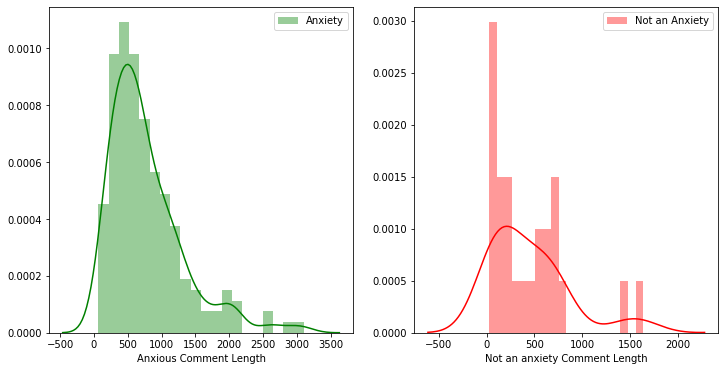

In [18]:
#Plotting the distribution of comment beore cleaning the comment_text column
f,ax = plt.subplots(1,2,figsize=(12,6))

sns.distplot(train[train['label']==1]['comment_length'],bins=20, ax=ax[0],label='Anxiety',color='g')
ax[0].set_xlabel('Anxious Comment Length')
ax[0].legend()

sns.distplot(train[train['label']==0]['comment_length'],bins=20, ax=ax[1],label='Not an Anxiety',color='r')
ax[1].set_xlabel('Not an anxiety Comment Length')
ax[1].legend()

plt.show()

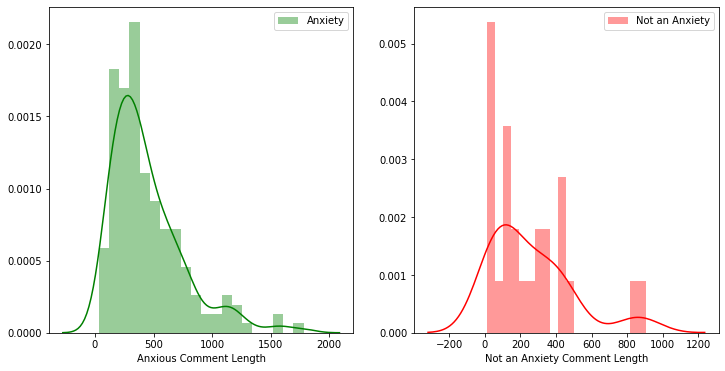

In [19]:
#Plotting the distribution of comment after cleaning the comment_text column
f,ax = plt.subplots(1,2,figsize=(12,6))

sns.distplot(train[train['label']==1]['cleaned_text'],bins=20, ax=ax[0],label='Anxiety',color='g')
ax[0].set_xlabel('Anxious Comment Length')
ax[0].legend()

sns.distplot(train[train['label']==0]['cleaned_text'],bins=20, ax=ax[1],label='Not an Anxiety',color='r')
ax[1].set_xlabel('Not an Anxiety Comment Length')
ax[1].legend()

plt.show()

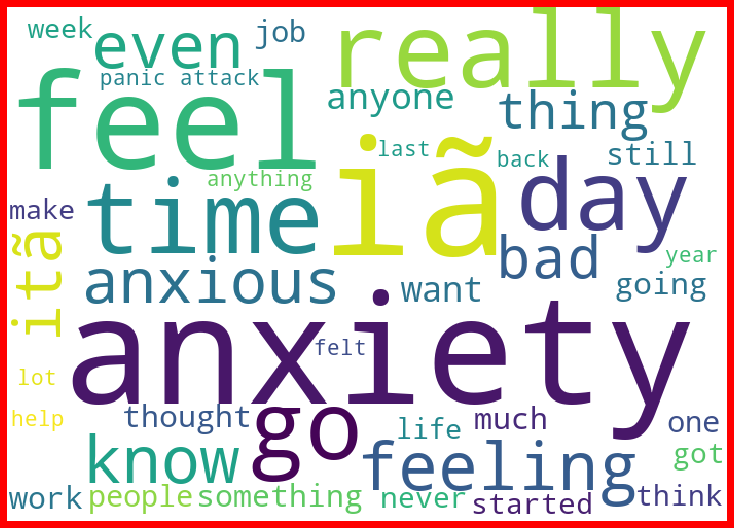

In [20]:
#Getting sense of loud words for Anxiety Comments in label column

from wordcloud import WordCloud


spams = train['text'][train['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=40).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

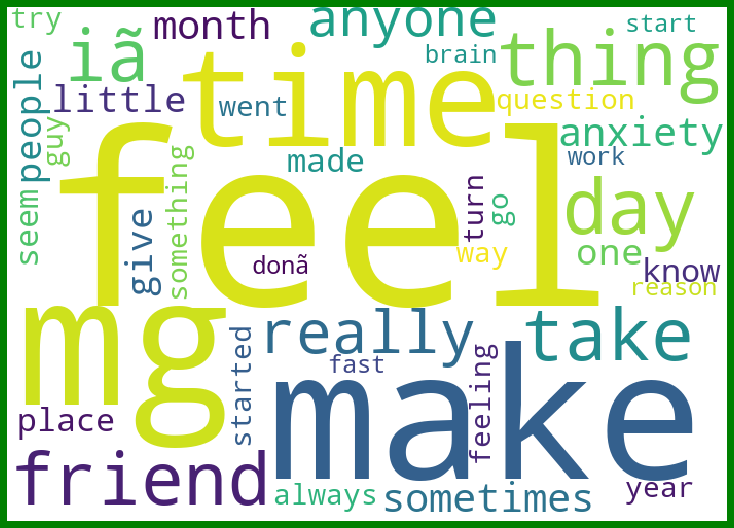

In [21]:
#Getting sense of loud words for Benign Comments in label column

from wordcloud import WordCloud


spams = train['text'][train['label']==0]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=40).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Converting the text into vectors using TF-IDF Vectorizer

In [22]:
# Importing the library and converting it into vectors
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 1500, stop_words='english')

In [23]:
#Independent Features
X = tf_vec.fit_transform(train['text'])

In [24]:
#Dependent Feature
y = train['label']

In [25]:
#Checking the distribution of the labels
print("Count of Benign and Malignant Comments:\n",train.label.value_counts())

Count of Benign and Malignant Comments:
 1    175
0     25
Name: label, dtype: int64


In [26]:
#Checking the distribution of the labels  percentage wise.
train['label'].value_counts(normalize=True) *100

1    87.5
0    12.5
Name: label, dtype: float64

Observation:

    After seeing the label column which is also our target feature for this dataset it is clearly shown that 89.83% of
    data is label 0 and only 10.16% of data is label 1 so our dataset is implanced. So before making the ML model first we
    have to do sampling to get rid off imblance dataset.

## Model Training

In [27]:
#checking the shape of input and target variable
print(X.shape,'\t\t',y.shape)

(200, 1500) 		 (200,)


In [28]:
#Splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42,stratify=y)

In [29]:
#Checking the shape

print(x_train.shape,'\t\t',x_test.shape)

(150, 1500) 		 (50, 1500)


In [30]:
#Checking the shape

print(y_train.shape,'\t',y_test.shape)

(150,) 	 (50,)


## DecisionTreeClassifeir

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [33]:
#Importing the error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV, KFold

In [34]:
y_pred_train = dtc.predict(x_train)
print('Training accuracy is {}\n'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test=dtc.predict(x_test)
print('Test accuracy is {}\n'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 1.0

Test accuracy is 0.8

[[ 1  5]
 [ 5 39]]
              precision    recall  f1-score   support

           0       0.17      0.17      0.17         6
           1       0.89      0.89      0.89        44

    accuracy                           0.80        50
   macro avg       0.53      0.53      0.53        50
weighted avg       0.80      0.80      0.80        50



## XGBoost Classifier

In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
y_pred_train = xgb.predict(x_train)
print('Training accuracy is {}\n'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test=xgb.predict(x_test)
print('Test accuracy is {}\n'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9933333333333333

Test accuracy is 0.88

[[ 1  5]
 [ 1 43]]
              precision    recall  f1-score   support

           0       0.50      0.17      0.25         6
           1       0.90      0.98      0.93        44

    accuracy                           0.88        50
   macro avg       0.70      0.57      0.59        50
weighted avg       0.85      0.88      0.85        50



### Now we use Sampling techniques to balance our dataset and then apply some models and see the result

## Under Sampling

#### By using the under sampling we are trying to reduce the points of maximum labels.

In [37]:
from collections import Counter
Counter(y_train)

Counter({1: 131, 0: 19})

In [38]:
# Importing the Undersampling library
from imblearn.under_sampling import NearMiss

ns = NearMiss(.8)
x_train_ns,y_train_ns = ns.fit_sample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({1: 131, 0: 19})
The number of classes after fit Counter({1: 23, 0: 19})


### Using XGBoost with Undersampled data

In [39]:
from xgboost import XGBClassifier
xgb_us = XGBClassifier()
xgb_us.fit(x_train_ns,y_train_ns)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
y_pred_train = xgb_us.predict(x_train_ns)
print('Training accuracy is {}\n'.format(accuracy_score(y_train_ns, y_pred_train)))
y_pred_test=xgb_us.predict(x_test)
print('Test accuracy is {}\n'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 1.0

Test accuracy is 0.68

[[ 4  2]
 [14 30]]
              precision    recall  f1-score   support

           0       0.22      0.67      0.33         6
           1       0.94      0.68      0.79        44

    accuracy                           0.68        50
   macro avg       0.58      0.67      0.56        50
weighted avg       0.85      0.68      0.73        50



#### From the above result we can clearly see that our under sampled model gives very poor result. So don't use under sampling unless, untill our dataset is very samll.

## Over Samping

#### By using the over sampling we are trying to increase the points of minimum labels.

In [41]:
# Importing the Oversampling library
from imblearn.over_sampling import RandomOverSampler

In [42]:
os = RandomOverSampler(0.75)
x_train_os,y_train_os = os.fit_sample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

The number of classes before fit Counter({1: 131, 0: 19})
The number of classes after fit Counter({1: 131, 0: 98})


### DecisionTree Classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train_os,y_train_os)

DecisionTreeClassifier()

In [44]:
y_pred_train = dtc.predict(x_train)
print('Training accuracy is {}\n'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test=dtc.predict(x_test)
print('Test accuracy is {}\n'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 1.0

Test accuracy is 0.96

[[ 4  2]
 [ 0 44]]
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.96      1.00      0.98        44

    accuracy                           0.96        50
   macro avg       0.98      0.83      0.89        50
weighted avg       0.96      0.96      0.96        50



In [45]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,y_pred_test)
print("AUC_Score:",auc_score)

AUC_Score: 0.8333333333333334


### XGBoost Classifier

In [46]:
from xgboost import XGBClassifier
XGBClassifier()

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [47]:
xgb = XGBClassifier(max_depth=15,
                    subsample= 0.8,
                    n_estimators=400,
                    learning_rate=0.01,
                    min_child_weight=10,
                    reg_alpha=0,
                    reg_lambda=5)
xgb.fit(x_train_os,y_train_os)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=15,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=5, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:
y_pred_train = xgb.predict(x_train)
print('Training accuracy is {}\n'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test=xgb.predict(x_test)
print('Test accuracy is {}\n'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.7933333333333333

Test accuracy is 0.74

[[ 3  3]
 [10 34]]
              precision    recall  f1-score   support

           0       0.23      0.50      0.32         6
           1       0.92      0.77      0.84        44

    accuracy                           0.74        50
   macro avg       0.57      0.64      0.58        50
weighted avg       0.84      0.74      0.78        50



In [49]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,y_pred_test)
print("AUC_Score:",auc_score)

AUC_Score: 0.6363636363636364


#### The AUC Score,f1-score and recall value is high when we use DecisionTree with over sampling data. So we choose DecisionTree model with over sampled data as our best model among all models.

### The AUC Score,f1-score and recall value is high when we use DecisionTree with over sampling data. So we choose DecisionTree model with over sampled data as our final model.

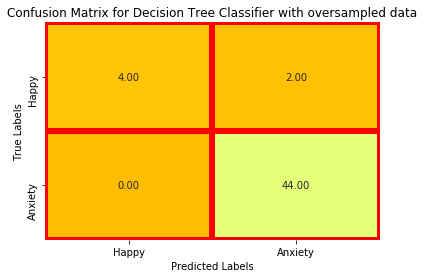

In [50]:
#Plotting Confusion Matrix for DecisionTree Classifier with oversampled data.
cm=confusion_matrix(y_test,dtc.predict(x_test))
ax=plt.subplot()
sns.heatmap(cm,annot=True,cbar=False,ax=ax,linewidths=5,linecolor='r',center=0,fmt='.2f',cmap='Wistia_r')
ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

plt.title("Confusion Matrix for Decision Tree Classifier with oversampled data")
ax.xaxis.set_ticklabels(['Happy','Anxiety'])
ax.yaxis.set_ticklabels(['Happy','Anxiety'])
plt.show()
plt.show()

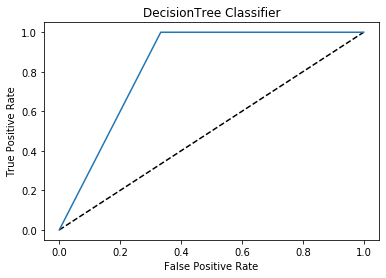

0.8333333333333334


In [51]:
#AUC_ROC Curve of DecisionTree Classifier with oversampled data

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,thredholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='DecisionTree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DecisionTree Classifier')
plt.show()

auc_score=roc_auc_score(y_test,dtc.predict(x_test))
print(auc_score)

In [52]:
# Seeing the top 15 features or words  which makes a comment toxic for our best Model.
import eli5
eli5.show_weights(xgb,vec = tf_vec, top = 15)  

Weight,Feature
0.3089,iã
0.2221,anxiety
0.1404,like
0.0999,make
0.0818,time
0.0608,feel
0.0433,really
0.0429,day
0,gave
0,girlfriend


### Model Validation

In [53]:
#Cleaning steps via calling our function for test data

# 1.Removing HTML tags
test.text = test.text.apply(clean)

#2.Removing Special Characters
test.text = test.text.apply(is_special)

#3.Convert into lower case
test.text = test.text.apply(lower)

#4.Stopwords Removal
test.text = test.text.apply(remove_stopwords)

#5.Lemmatization
test.text = test.text.apply(lema_text)

In [54]:
test_data =tf_vec.fit_transform(test.text)
test_data

<299x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 11330 stored elements in Compressed Sparse Row format>

In [55]:
prediction=dtc.predict(test_data)
prediction

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0], dtyp

### Saving the best model

In [56]:
#Saving the model
import joblib

#Save the model as a pickle in a file
model = joblib.dump(dtc,'Anxiety Comment.pkl')
model

['Anxiety Comment.pkl']